In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns
from imblearn.over_sampling import SMOTE

from sklearn.metrics import precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier

In [171]:
import xgboost as xgb
from xgboost import plot_importance


In [2]:
%matplotlib inline
warnings.filterwarnings("ignore", category=RuntimeWarning)
os.chdir(r'C:\Users\신상훈\바탕화면\학과\대학원 1-2\통계적 기계학습\머신러닝')

In [214]:
df = pd.read_csv('income_evaluation.csv')

In [108]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [110]:
df.shape

(32561, 15)

In [111]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [112]:
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [113]:
df[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


In [114]:
for var in categorical: 
    
    print(df[var].value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial

In [115]:
df['workclass'].replace(' ?', np.NaN, inplace=True)

In [116]:
df['occupation'].replace(' ?', np.NaN, inplace=True)

In [117]:
df['native_country'].replace(' ?', np.NaN, inplace=True)

In [118]:
df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

In [121]:
df['workclass'].fillna(df['workclass'].mode()[0], inplace=True)
df['occupation'].fillna(df['occupation'].mode()[0], inplace=True)
df['native_country'].fillna(df['native_country'].mode()[0], inplace=True) 

In [124]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df['income'])
labels = encoder.transform(df['income'])
print(labels)

[0 0 0 ... 0 0 1]


In [125]:
df['income'] = labels

In [126]:
X = df.drop(['income'], axis=1)

y = df['income']

In [217]:
y.value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [129]:
X_train.shape, X_test.shape

((22792, 14), (9769, 14))

In [130]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [131]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [132]:
X_train[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [133]:
X_test[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [134]:
X_train[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
32098,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
25206,State-gov,HS-grad,Divorced,Adm-clerical,Unmarried,White,Female,United-States
23491,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,United-States
12367,Private,HS-grad,Never-married,Craft-repair,Not-in-family,White,Male,Guatemala
7054,Private,7th-8th,Never-married,Craft-repair,Not-in-family,White,Male,Germany


In [135]:
import category_encoders as ce

In [136]:
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [137]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
32098,45,1,0,0,0,0,0,0,0,170871,...,0,0,0,0,0,0,0,0,0,0
25206,47,0,1,0,0,0,0,0,0,108890,...,0,0,0,0,0,0,0,0,0,0
23491,48,1,0,0,0,0,0,0,0,187505,...,0,0,0,0,0,0,0,0,0,0
12367,29,1,0,0,0,0,0,0,0,145592,...,0,0,0,0,0,0,0,0,0,0
7054,23,1,0,0,0,0,0,0,0,203003,...,0,0,0,0,0,0,0,0,0,0


In [138]:
X_train.shape

(22792, 105)

In [139]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
22278,27,1,0,0,0,0,0,0,0,177119,...,0,0,0,0,0,0,0,0,0,0
8950,27,1,0,0,0,0,0,0,0,216481,...,0,0,0,0,0,0,0,0,0,0
7838,25,1,0,0,0,0,0,0,0,256263,...,0,0,0,0,0,0,0,0,0,0
16505,46,1,0,0,0,0,0,0,0,147640,...,0,0,0,0,0,0,0,0,0,0
19140,45,1,0,0,0,0,0,0,0,172822,...,0,0,0,0,0,0,0,0,0,0


In [140]:
X_test.shape

(9769, 105)

In [141]:
cols = X_train.columns

In [142]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [143]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [144]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [145]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [146]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

## 모델 생성

## RF

In [147]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[200],
    'max_depth' : [10,12,14], 
    'min_samples_leaf' : [1 ],
    'min_samples_split' : [12,14,16]
}
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_rf = GridSearchCV(rf_clf , param_grid=params , cv=2, n_jobs=-1 )
grid_rf.fit(X_train , y_train)

print('최적 하이퍼 파라미터:\n', grid_rf.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_rf.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 16, 'n_estimators': 200}
최고 예측 정확도: 0.8577


In [148]:
best_rf = grid_rf.best_estimator_
best_rf.fit(X_train,y_train)
best_pred = best_rf.predict(X_test)
get_model_train_eval(best_rf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)


오차 행렬
[[7050  357]
 [1006 1356]]
정확도: 0.8605, 정밀도: 0.7916, 재현율: 0.5741,    F1: 0.6655, AUC:0.9149


In [151]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [153]:
ftr_importance

age                  0.067023
workclass_1          0.004663
workclass_2          0.001866
workclass_3          0.005079
workclass_4          0.004211
                       ...   
native_country_37    0.000022
native_country_38    0.000130
native_country_39    0.000030
native_country_40    0.000033
native_country_41    0.000000
Length: 105, dtype: float64

In [213]:
feature_scores = pd.Series(best_rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores[:20]

capital_gain        0.148797
marital_status_1    0.119257
education_num       0.108499
relationship_1      0.091756
age                 0.067023
hours_per_week      0.053384
marital_status_3    0.048021
capital_loss        0.039002
occupation_9        0.026589
education_4         0.023444
relationship_6      0.021630
relationship_4      0.020217
relationship_3      0.019990
fnlwgt              0.018270
sex_2               0.016706
education_7         0.015824
sex_1               0.014895
education_1         0.010155
education_5         0.009522
occupation_4        0.009443
dtype: float64

In [198]:
X_train.columns

MultiIndex([(              'age',),
            (      'workclass_1',),
            (      'workclass_2',),
            (      'workclass_3',),
            (      'workclass_4',),
            (      'workclass_5',),
            (      'workclass_6',),
            (      'workclass_7',),
            (      'workclass_8',),
            (           'fnlwgt',),
            ...
            ('native_country_32',),
            ('native_country_33',),
            ('native_country_34',),
            ('native_country_35',),
            ('native_country_36',),
            ('native_country_37',),
            ('native_country_38',),
            ('native_country_39',),
            ('native_country_40',),
            ('native_country_41',)],
           length=105)

In [215]:
ftr1 = ftr_top.reset_index(level = [0]).set_index(['level_0']).index

<AxesSubplot:title={'center':'Feature importance'}, ylabel='level_0'>

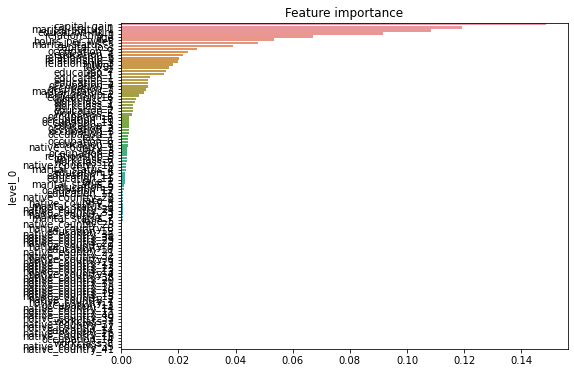

In [216]:
ftr_importance_values = best_rf.feature_importances_
ftr_importance = pd.Series(ftr_importance_values, index = X_train.columns)
ftr_top = ftr_importance.sort_values(ascending = False)

plt.figure(figsize = (8,6))
plt.title('Feature importance')
sns.barplot(x = ftr_top, y = ftr1)

In [210]:
ftr_top

capital_gain         0.148797
marital_status_1     0.119257
education_num        0.108499
relationship_1       0.091756
age                  0.067023
                       ...   
native_country_16    0.000008
occupation_14        0.000007
workclass_8          0.000004
native_country_35    0.000001
native_country_41    0.000000
Length: 105, dtype: float64

## LGBM

In [200]:
y_train

32098    1
25206    0
23491    1
12367    0
7054     0
        ..
13123    1
19648    0
9845     0
10799    1
2732     0
Name: income, Length: 22792, dtype: int32

In [ ]:
best_lgbm = grid_lgbm.best_estimator_
best_lgbm.fit(X_train,y_train)
best_pred = best_lgbm.predict(X_test)
get_model_train_eval(best_lgbm, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)


In [ ]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
# 사이킷런 래퍼 클래스를 입력해도 무방. 
plot_importance(best_lgbm, ax=ax)

## xgboost

In [172]:
dtrain = xgb.DMatrix(data=X_train , label=y_train)
dtest = xgb.DMatrix(data=X_test , label=y_test)

In [173]:
params = { 'max_depth':3,
           'eta': 0.1,
           'objective':'binary:logistic',
           'eval_metric':'logloss',
           'early_stoppings':100
        }
num_rounds = 400

In [174]:
wlist = [(dtrain,'train'),(dtest,'eval') ]
# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params , dtrain=dtrain , num_boost_round=num_rounds , evals=wlist )

[23:01:03] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.64143	eval-logloss:0.64129
[1]	train-logloss:0.59916	eval-logloss:0.59897
[2]	train-logloss:0.56406	eval-logloss:0.56393
[3]	train-logloss:0.53452	eval-logloss:0.53444
[4]	train-logloss:0.50947	eval-logloss:0.50938
[5]	train-logloss:0.48796	eval-logloss:0.48792
[6]	train-logloss:0.46945	eval-logloss:0.46962
[7]	train-logloss:0.45331	eval-logloss:0.45364
[8]	train-logloss:0.43938	eval-logloss:0.43973
[9]	train-logloss:0.42639	eval-logloss:0.42675
[10]	train-logloss:0.41554	eval-logloss:0.41604
[11]	train-logloss:0.40562	eval-logloss:0.40615
[12]	train-logloss:0.39685	eval-logloss:0

[162]	train-logloss:0.27465	eval-logloss:0.28746
[163]	train-logloss:0.27446	eval-logloss:0.28723
[164]	train-logloss:0.27440	eval-logloss:0.28722
[165]	train-logloss:0.27410	eval-logloss:0.28691
[166]	train-logloss:0.27400	eval-logloss:0.28692
[167]	train-logloss:0.27393	eval-logloss:0.28693
[168]	train-logloss:0.27381	eval-logloss:0.28690
[169]	train-logloss:0.27371	eval-logloss:0.28685
[170]	train-logloss:0.27343	eval-logloss:0.28655
[171]	train-logloss:0.27328	eval-logloss:0.28643
[172]	train-logloss:0.27322	eval-logloss:0.28638
[173]	train-logloss:0.27306	eval-logloss:0.28636
[174]	train-logloss:0.27290	eval-logloss:0.28623
[175]	train-logloss:0.27286	eval-logloss:0.28621
[176]	train-logloss:0.27279	eval-logloss:0.28624
[177]	train-logloss:0.27267	eval-logloss:0.28621
[178]	train-logloss:0.27259	eval-logloss:0.28619
[179]	train-logloss:0.27253	eval-logloss:0.28614
[180]	train-logloss:0.27240	eval-logloss:0.28604
[181]	train-logloss:0.27233	eval-logloss:0.28601
[182]	train-logloss:

[330]	train-logloss:0.26146	eval-logloss:0.28152
[331]	train-logloss:0.26137	eval-logloss:0.28144
[332]	train-logloss:0.26125	eval-logloss:0.28129
[333]	train-logloss:0.26118	eval-logloss:0.28126
[334]	train-logloss:0.26114	eval-logloss:0.28126
[335]	train-logloss:0.26104	eval-logloss:0.28131
[336]	train-logloss:0.26096	eval-logloss:0.28130
[337]	train-logloss:0.26090	eval-logloss:0.28130
[338]	train-logloss:0.26088	eval-logloss:0.28128
[339]	train-logloss:0.26085	eval-logloss:0.28127
[340]	train-logloss:0.26080	eval-logloss:0.28125
[341]	train-logloss:0.26067	eval-logloss:0.28120
[342]	train-logloss:0.26060	eval-logloss:0.28116
[343]	train-logloss:0.26047	eval-logloss:0.28114
[344]	train-logloss:0.26046	eval-logloss:0.28114
[345]	train-logloss:0.26044	eval-logloss:0.28113
[346]	train-logloss:0.26040	eval-logloss:0.28115
[347]	train-logloss:0.26031	eval-logloss:0.28113
[348]	train-logloss:0.26028	eval-logloss:0.28114
[349]	train-logloss:0.26019	eval-logloss:0.28113
[350]	train-logloss:

In [175]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5 보다 크면 1 , 그렇지 않으면 0 으로 예측값 결정하여 List 객체인 preds에 저장 
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:',preds[:10])

predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.018 0.037 0.183 0.479 0.583 0.471 0.053 0.061 0.108 0.   ]
예측값 10개만 표시: [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


In [176]:
get_clf_eval(y_test , preds, pred_probs)

오차 행렬
[[6966  441]
 [ 818 1544]]
정확도: 0.8711, 정밀도: 0.7778, 재현율: 0.6537,    F1: 0.7104, AUC:0.9275


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

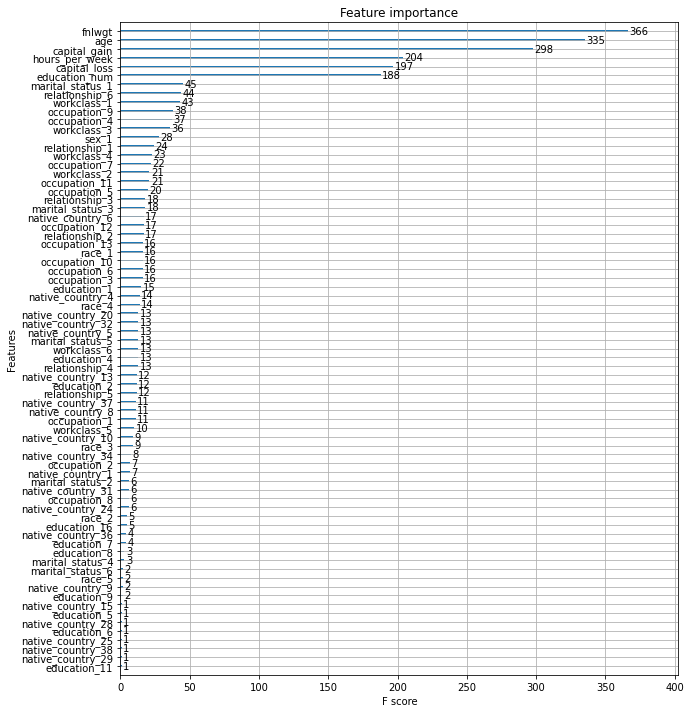

In [177]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)